   COUNTRY COURSE TYPE                COURSE (SPECIALIZATION)        FEES
0  GERMANY         MBA              MBA in Sales & Marketing   3678127.31
1  GERMANY         MBA                         MBA in Banking  1253594.37
2  GERMANY         MBA         MBA in Business Administration   454540.69
3  GERMANY         MBA  MBA in Hospital/Healthcare Management  3246719.22
4  GERMANY         MBA       MBA in Human Resource Management  1217519.71
     COUNTRY            COURSE TYPE   total_fees     mean_fees  course_count  \
0  AUSTRALIA                  M.ENG  29104924.43  2.078923e+06            14   
1  AUSTRALIA                   M.Sc  16379318.08  2.047415e+06             8   
2  AUSTRALIA  MASTERS OF MANAGEMENT  26892397.79  1.920886e+06            14   
3  AUSTRALIA                    MBA  12113668.09  2.018945e+06             6   
4    BELGIUM                  M.ENG   3694906.00  3.694906e+05            10   

     min_fees    max_fees       std_fees      var_fees  
0  1627902.18  228

C:\Users\ivan_\AppData\Local\Temp\ipykernel_24560\838907703.py:50: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('COUNTRY').apply(calcular_desviacion)


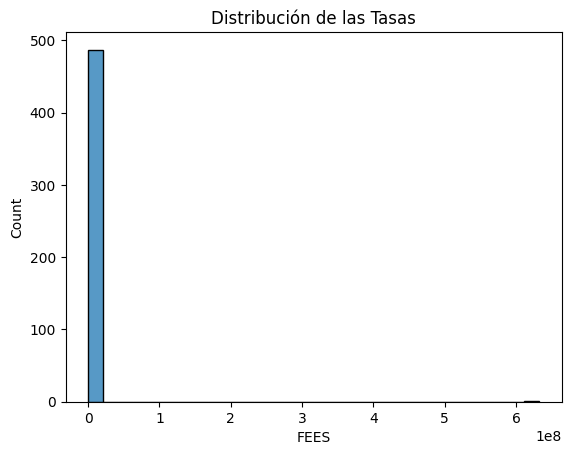

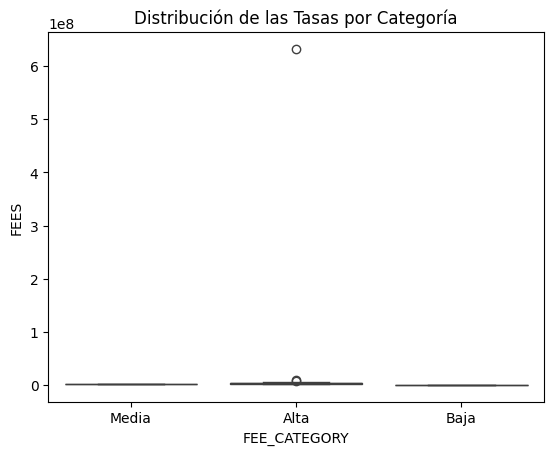

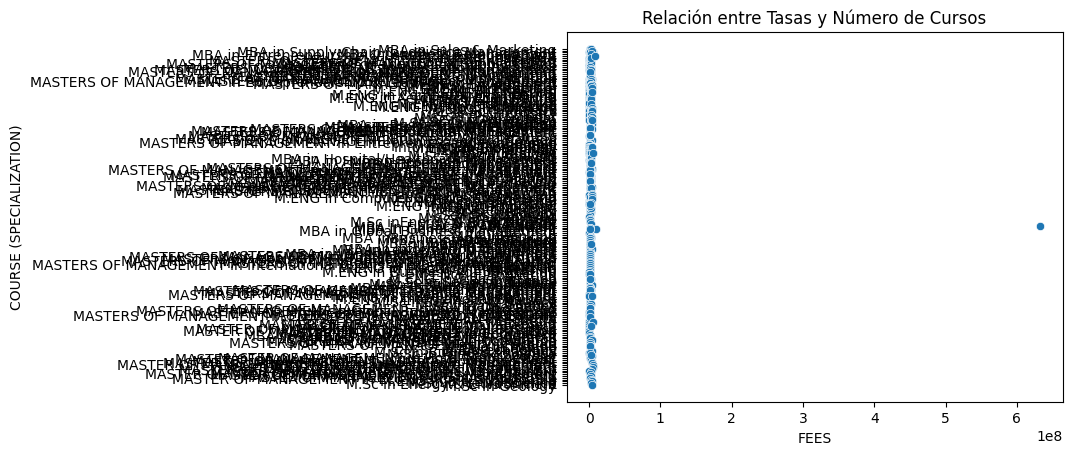

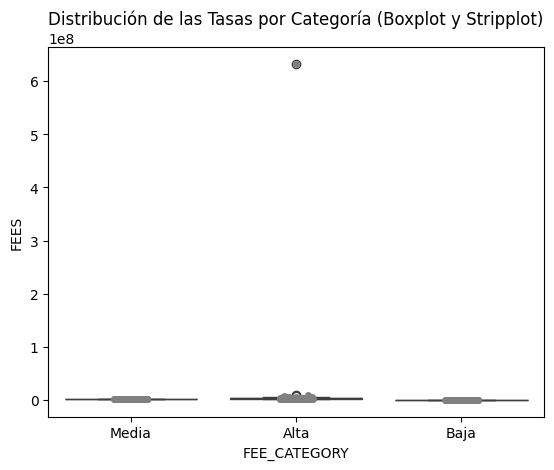

In [2]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargamos el dataset
df = pd.read_csv('C:/Users/ivan_/Documents/bootcamp/python_para_datos/pandas avanzado/abroad  - Sheet1.csv')

# Mostramos las primeras filas para inspeccionar el dataset
print(df.head())

# Convertimos la columna 'FEES' a formato numérico
df['FEES'] = pd.to_numeric(df['FEES'], errors='coerce')

# Normalizamos las tasas (fees)
df['FEES_NORMALIZED'] = (df['FEES'] - df['FEES'].min()) / (df['FEES'].max() - df['FEES'].min())

# Función para clasificar las tasas de los cursos en 'Alta', 'Media' o 'Baja'
def clasificar_fees(fees):
    if fees >= df['FEES'].quantile(0.75):
        return 'Alta'
    elif fees >= df['FEES'].quantile(0.25):
        return 'Media'
    else:
        return 'Baja'

# Aplicamos la función y creamos una nueva columna con la clasificación
df['FEE_CATEGORY'] = df['FEES'].apply(clasificar_fees)

# Agrupamos por país (COUNTRY) y tipo de curso (COURSE TYPE) y calculamos estadísticas descriptivas
grouped = df.groupby(['COUNTRY', 'COURSE TYPE']).agg(
    total_fees=pd.NamedAgg(column='FEES', aggfunc='sum'),
    mean_fees=pd.NamedAgg(column='FEES', aggfunc='mean'),
    course_count=pd.NamedAgg(column='COURSE (SPECIALIZATION)', aggfunc='count'),
    min_fees=pd.NamedAgg(column='FEES', aggfunc='min'),
    max_fees=pd.NamedAgg(column='FEES', aggfunc='max'),
    std_fees=pd.NamedAgg(column='FEES', aggfunc='std'),
    var_fees=pd.NamedAgg(column='FEES', aggfunc='var')
).reset_index()

# Mostramos las primeras filas del agrupamiento
print(grouped.head())

# Función para calcular la desviación respecto a la media
def calcular_desviacion(grupo):
    grupo['DESVIACION_FEE'] = grupo['FEES'] - grupo['FEES'].mean()
    return grupo

# Aplicamos la función a cada grupo de país
df = df.groupby('COUNTRY').apply(calcular_desviacion)

# Mostramos el resultado con las nuevas columnas
print(df[['COUNTRY', 'FEES', 'DESVIACION_FEE']].head())

# Guardamos el dataset transformado en un archivo CSV
df.to_csv('output_transformed_dataset.csv', index=False)


# Análisis descriptivo y visualización
# Estadísticas descriptivas
print(df.describe())

# Histogramas
sns.histplot(data=df, x='FEES', bins=30)
plt.title('Distribución de las Tasas')
plt.show()

# Boxplots
sns.boxplot(data=df, x='FEE_CATEGORY', y='FEES')
plt.title('Distribución de las Tasas por Categoría')
plt.show()

# Gráficos de líneas (asumiendo una columna 'DATE')
# Si no tienes una columna de fecha, crea una o agrupa por otro criterio temporal
if 'DATE' in df.columns:
    sns.lineplot(data=df, x='DATE', y='FEES', hue='COUNTRY')
    plt.title('Tendencia de las Tasas por País')
    plt.show()

# Gráficos de dispersión
sns.scatterplot(data=df, x='FEES', y='COURSE (SPECIALIZATION)')
plt.title('Relación entre Tasas y Número de Cursos')
plt.show()

# Combinación de histogramas y boxplots
sns.boxplot(x='FEE_CATEGORY', y='FEES', data=df)
sns.stripplot(x='FEE_CATEGORY', y='FEES', data=df, jitter=True, color='gray')
plt.title('Distribución de las Tasas por Categoría (Boxplot y Stripplot)')
plt.show()